In [6]:
from sympy import symbols
from IPython.display import display


In [46]:
import sympy as sm
import scipy.constants as con

V0,V1,V2=sm.symbols('V0 V1 V2')
Vprev0, Vprev1, Vprev2=sm.symbols('Vprev0:3')
n0,n1,n2=sm.symbols('n0 n1 n2')
nprev0, nprev1, nprev2=sm.symbols('nprev0:3')
p0,p1,p2=sm.symbols('p0:%d' % 3)
pprev0,pprev1,pprev2=sm.symbols('pprev0:%d'%3)
ni=sm.symbols('ni')
dt,dx=sm.symbols('dt dx')
G=sm.symbols('G')
q=sm.symbols('q')
k,T,un,up=sm.symbols('k T un,up')
Rb=sm.symbols('Rb')
mog=sm.symbols('mog')
def B(psi):
    return psi / (sm.exp(psi) - 1)

# Scharfetter-Gummel flux between node i and j (using node i on left, j on right)
def J(n_i, n_j, phi_i, phi_j,u):
    psi = (phi_j - phi_i)
    return (k*T*u/dx) * (B(psi)*n_j - B(-psi)*n_i )
nF1=(J(n1,n2,V1,V2,un)-J(n0,n1,V0,V1,un))/(q*dx) + G - Rb*(n1*p1-ni**2)
nF2=(J(nprev1,nprev2,Vprev1,Vprev2,un)-J(nprev0,nprev1,Vprev0,Vprev1,un))/(q*dx) + G - Rb*(nprev1*pprev1-ni**2)
nF=(n1-nprev1)/dt - (nF1+nF2)/2

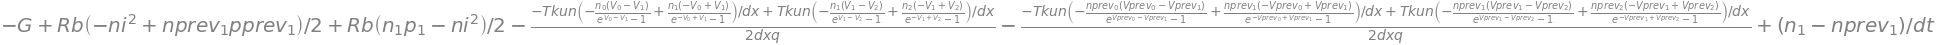

subdiag -T*k*un*(V0 - V1)/(2*dx**2*q*(exp(V0 - V1) - 1))
diag Rb*p1/2 - (-T*k*un*(-V0 + V1)/(dx*(exp(-V0 + V1) - 1)) - T*k*un*(V1 - V2)/(dx*(exp(V1 - V2) - 1)))/(2*dx*q) + 1/dt
superdiag -T*k*un*(-V1 + V2)/(2*dx**2*q*(exp(-V1 + V2) - 1))


In [48]:
display(nF)

print("subdiag",sm.diff(nF,n0))
print("diag",sm.diff(nF,n1))
print("superdiag",sm.diff(nF,n2))

In [52]:
import sympy as sm
import scipy.constants as con

V0,V1,V2=sm.symbols('V0 V1 V2')
Vprev0, Vprev1, Vprev2=sm.symbols('Vprev0:3')
n0,n1,n2=sm.symbols('n0 n1 n2')
nprev0, nprev1, nprev2=sm.symbols('nprev0:3')
p0,p1,p2=sm.symbols('p0:%d' % 3)
pprev0,pprev1,pprev2=sm.symbols('pprev0:%d'%3)
ni=sm.symbols('ni')
dt,dx=sm.symbols('dt dx')
G=sm.symbols('G')
q=sm.symbols('q')
k,T,un,up=sm.symbols('k T un,up')
Rb=sm.symbols('Rb')
mog=sm.symbols('mog')
def B(psi):
    return psi / (sm.exp(psi) - 1)

# Scharfetter-Gummel flux between node i and j (using node i on left, j on right)
def Jp(p_i, p_j, phi_i, phi_j,u):
    psi = (phi_i - phi_j)
    return (k*T*u/dx) * (B(psi)*p_j - B(-psi)*p_i )
pF1=-(Jp(p1,p2,V1,V2,up)-Jp(p0,p1,V0,V1,up))/(q*dx) + G - Rb*(n1*p1-ni**2)
pF2=-(Jp(pprev1,pprev2,Vprev1,Vprev2,up)-Jp(pprev0,pprev1,Vprev0,Vprev1,up))/(q*dx) + G - Rb*(nprev1*pprev1-ni**2)
pF=(p1-pprev1)/dt - (pF1+pF2)/2

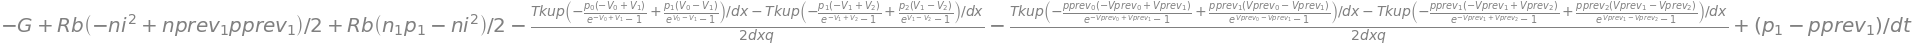

'subdiag'

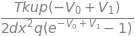

'diag'

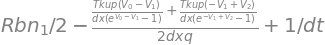

'superdiag'

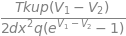

subdiag T*k*up*(-V0 + V1)/(2*dx**2*q*(exp(-V0 + V1) - 1))
diag Rb*n1/2 - (T*k*up*(V0 - V1)/(dx*(exp(V0 - V1) - 1)) + T*k*up*(-V1 + V2)/(dx*(exp(-V1 + V2) - 1)))/(2*dx*q) + 1/dt
superdiag T*k*up*(V1 - V2)/(2*dx**2*q*(exp(V1 - V2) - 1))


In [54]:
display(pF)
display("subdiag",sm.diff(pF,p0))
display("diag",sm.diff(pF,p1))
display("superdiag",sm.diff(pF,p2))
print("subdiag",sm.diff(pF,p0))
print("diag",sm.diff(pF,p1))
print("superdiag",sm.diff(pF,p2))